In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
a=pd.read_csv('Diwali_Sales_Data.csv',encoding='unicode_escape')
a.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [20]:
a.isnull().sum()/len(a)*100

User_ID             0.0
Cust_name           0.0
Product_ID          0.0
Gender              0.0
Age Group           0.0
Age                 0.0
Marital_Status      0.0
State               0.0
Zone                0.0
Occupation          0.0
Product_Category    0.0
Orders              0.0
Amount              0.0
dtype: float64

In [23]:
a.nunique()

User_ID             3752
Cust_name           1250
Product_ID          2350
Gender                 2
Age Group              7
Age                   81
Marital_Status         2
State                 16
Zone                   5
Occupation            15
Product_Category      18
Orders                 4
Amount              6584
dtype: int64

In [35]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [48]:
a['Amount']=a['Amount'].astype('int')

In [53]:
a['Age Group'].value_counts(normalize=True)*100

26-35    40.403951
36-45    20.313195
18-25    16.718569
46-50     8.746330
51-55     7.384999
55+       3.799270
0-17      2.633686
Name: Age Group, dtype: float64

In [98]:
a.rename(columns={'Age Group':'Age_group'},inplace=True)

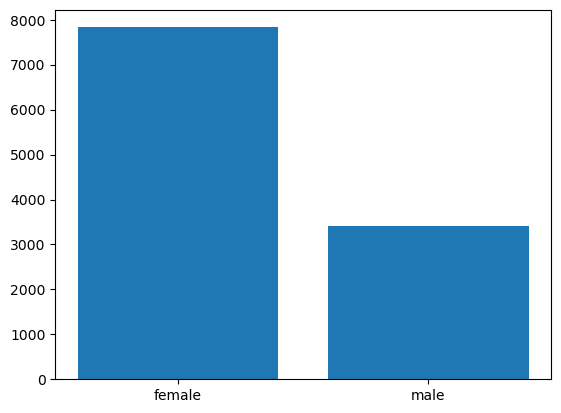

In [62]:
plt.bar(['female','male'],a.Gender.value_counts())
plt.show()

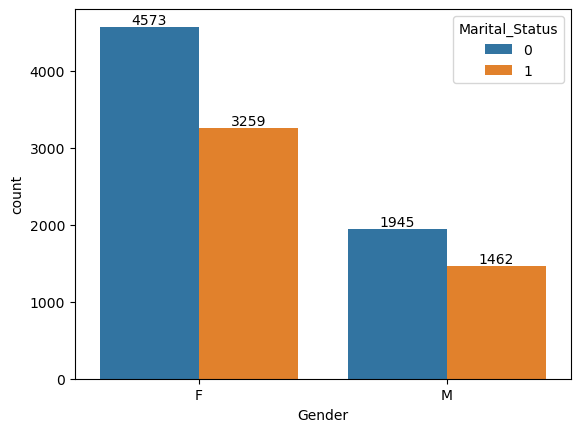

In [133]:
g=sns.countplot(x="Gender",hue='Marital_Status', data=a)
for i in g.containers:
    g.bar_label(i)


<Axes: xlabel='State', ylabel='Orders'>

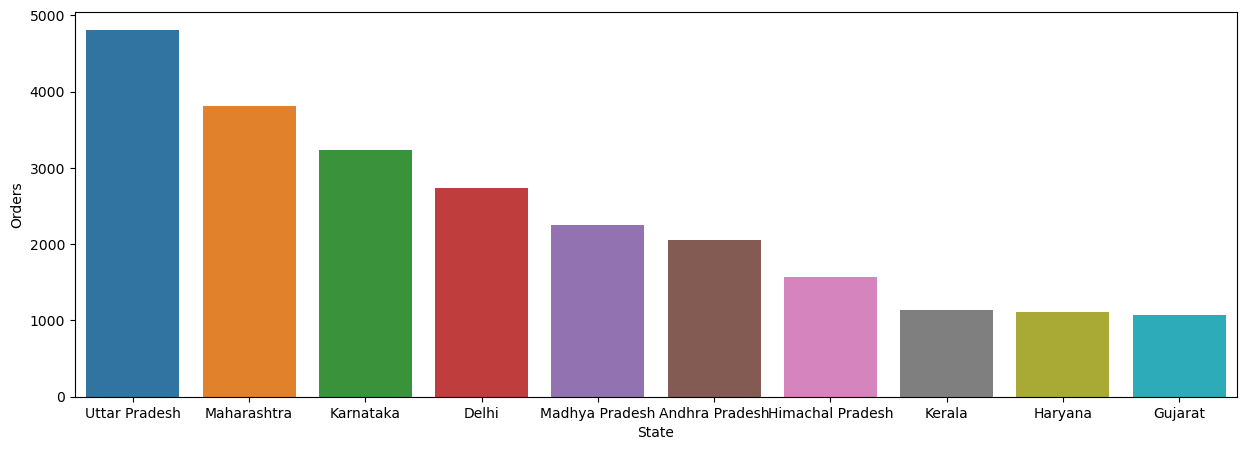

In [171]:
by_state=a.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x='State',y='Orders',data=by_state)
#or
#plt.xticks(rotation=90)
#plt.show()


In [94]:
by_zone=a.groupby('Zone')['Amount'].sum().sort_values(ascending=False)
by_zone

Zone
Central     41600872
Southern    26606667
Western     18373625
Northern    12618752
Eastern      7049213
Name: Amount, dtype: int32

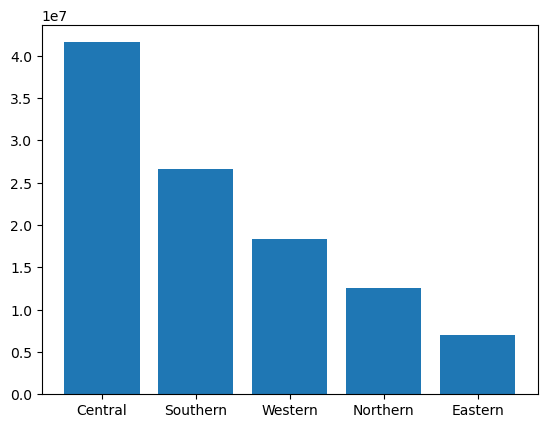

In [128]:
plt.bar(by_zone.index,by_zone.values)
plt.show()

In [101]:
a.Age_group.value_counts().sort_values(ascending=False)

26-35    4541
36-45    2283
18-25    1879
46-50     983
51-55     830
55+       427
0-17      296
Name: Age_group, dtype: int64

In [104]:
procat=a.Product_Category.value_counts().sort_values(ascending=False)

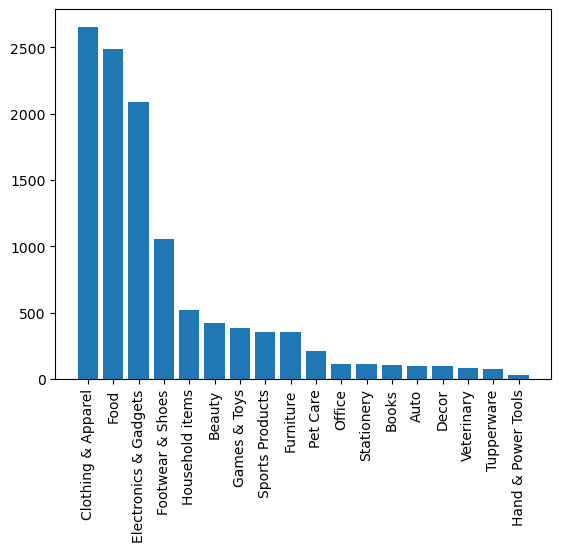

In [108]:
plt.bar(procat.index,procat.values)
plt.xticks(rotation=90)
plt.show()

In [156]:
agegr=a.groupby(['Age_group'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
agegr

,Age_group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<Axes: xlabel='Age_group', ylabel='Amount'>

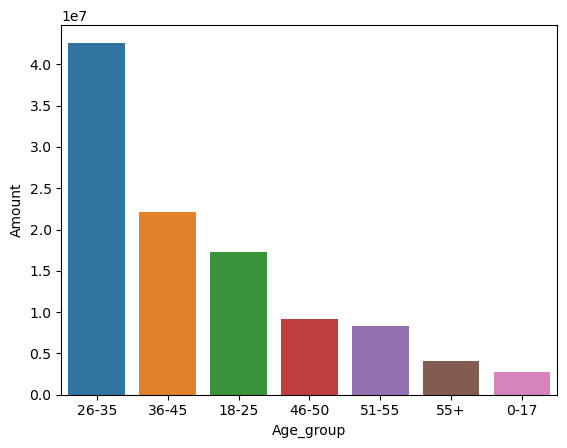

In [160]:
sns.barplot(x='Age_group',y='Amount',data=agegr)

In [142]:
gen=a.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount' ,ascending=False)
gen


,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

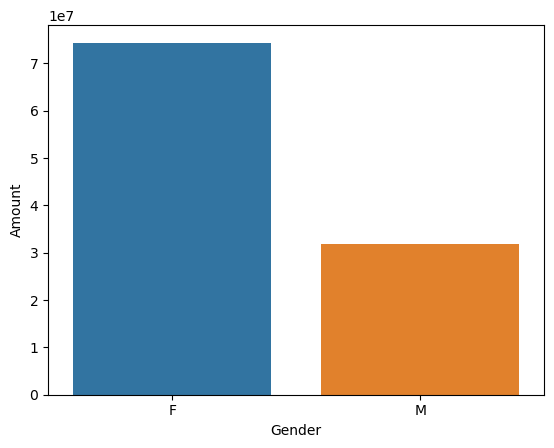

In [144]:
sns.barplot(x='Gender',y='Amount',data=gen)

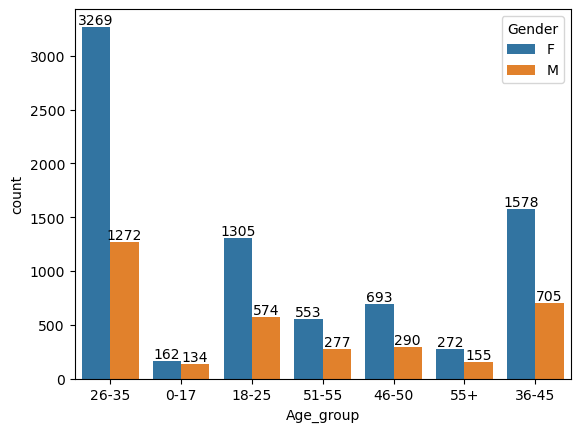

In [147]:
age=sns.countplot(x='Age_group',hue='Gender',data=a)
for i in age.containers:
    age.bar_label(i)

<Axes: xlabel='Age_group', ylabel='Amount'>

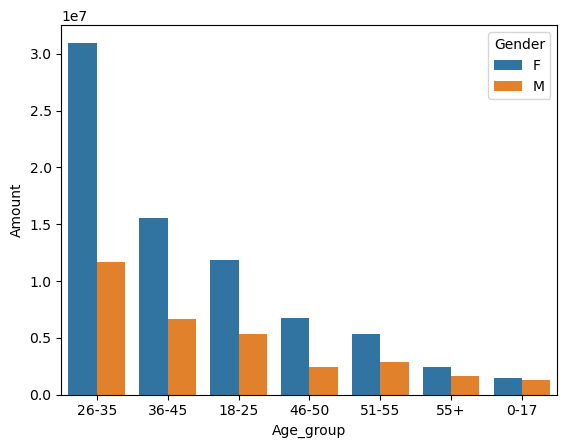

In [177]:
sales=a.groupby(['Age_group','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Age_group', y='Amount', hue='Gender', data=sales)